# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness);
- [данные по фильмам и сериалам Netflix](https://www.kaggle.com/shivamb/netflix-shows).

### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


In [333]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

In [390]:
netflix = pd.read_csv('netflix_titles.csv')[['show_id','type','title','country','date_added','release_year','rating','duration','listed_in']]

Text(0.5, 1.0, 'Show Statistics 2000-2020')

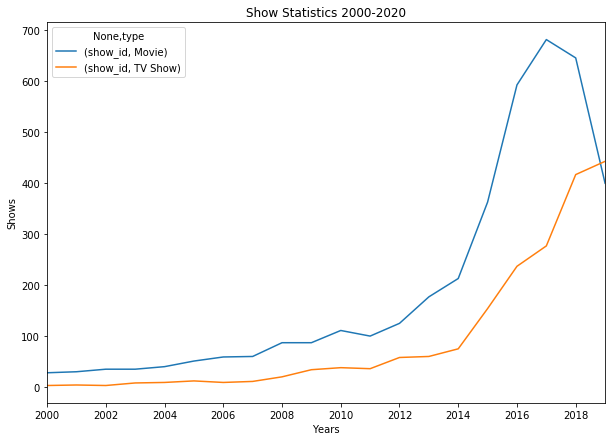

In [412]:
netflix_stats_all = netflix[(netflix['release_year'] >= 2000) & (netflix['release_year'] < 2020)].groupby(['release_year','type']).count()[['show_id']]
netflix_stats.unstack('type').plot(xticks=range(2000,2020,2))
plt.xlabel('Years')
plt.ylabel('Shows')
plt.title('Show Statistics 2000-2020')

Интерес зрителей Netflix к сериалам в последние годы превышает интерес к фильмам. 
Netflix снижает выпуск фильмов после провала ряда фильмов и успеха ряда сериалов.

In [392]:
netflix['country'].replace(np.nan, 'Undefined', inplace=True)
netflix_countries = netflix.loc[(netflix['release_year'] >= 2010) & (netflix['release_year'] < 2020), :][['show_id','type','country','release_year']]
netflix_countries.head()

,show_id,type,country,release_year
0,81145628,Movie,"United States, India, South Korea, China",2019
1,80117401,Movie,United Kingdom,2016
2,70234439,TV Show,United States,2013
3,80058654,TV Show,United States,2016
4,80125979,Movie,United States,2017


In [404]:
countries = ['United States', 'Canada', 'France', 'Germany', 'United Kingdom', 'Italy', 'Japan']

In [405]:
for country_name in countries:
    netflix_countries[country_name] = netflix_countries.loc[netflix_countries.country.str.contains(country_name), 'show_id']

In [406]:
netflix_countries['country_type'] = netflix_countries.apply(lambda row: 'G7' if row[-8 : -2].count() != 0 else row.country if row.country == 'Undefined' else 'Not G7', axis=1)

Text(0.5, 1.0, 'G7 Country Production Statistics 2010-2020')

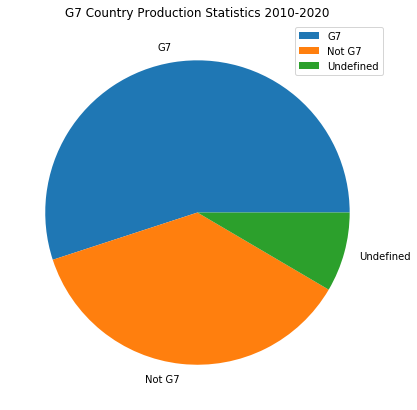

In [411]:
netflix_stats_ct = netflix_countries[].groupby(['country_type']).count()[['show_id']]
netflix_stats_ct.plot(kind='pie', y='show_id')
plt.ylabel('')
plt.title('Country_Type Production Statistics 2010-2020')

In [ ]:
Имеется большая погрешность в предоставленных данных.
Кинематограф стран, не относящихся к странам G7, заполянет половину эфира Netflix

Text(0.5, 1.0, 'Country_Type Production Statistics 2010-2020')

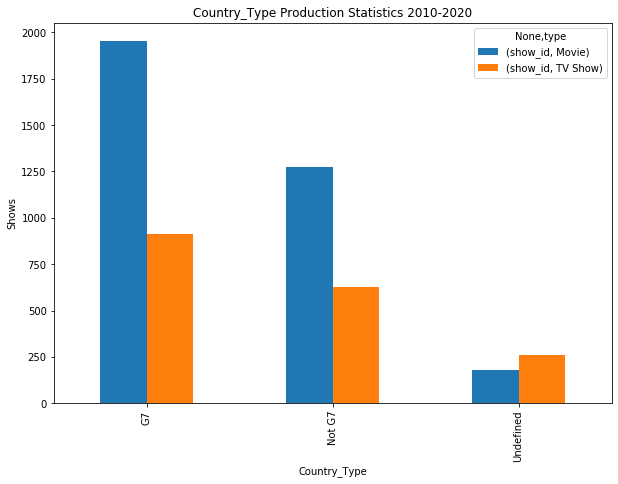

In [419]:
netflix_stats_t = netflix_countries.groupby(['country_type','type']).count()[['show_id']]
netflix_stats_t.unstack().plot(kind='bar')
plt.xlabel('Country_Type')
plt.ylabel('Shows')
plt.title('Show Type by  Statistics 2010-2020')

Объем кинопроизводства фильмов примерно в 2 раза превышает объем производства сериалов независимо от типа страны

Text(0.5, 1.0, 'G7 Countries Production Statistics 2010-2020')

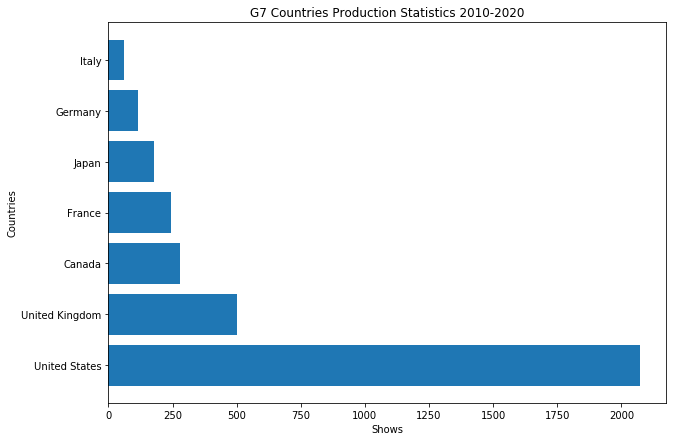

In [477]:
netflix_stats_g7 = netflix_countries.groupby(['type']).count().iloc[:,-8:-1].T.reset_index()
netflix_stats_g7['Sum'] = netflix_stats_g7['Movie']+netflix_stats_g7['TV Show']
netflix_stats_g7 = netflix_stats_g7.sort_values('Sum', ascending=False)
plt.barh(netflix_stats_g7['index'], netflix_stats_g7['Sum'])
plt.xlabel('Shows')
plt.ylabel('Countries')
plt.title('G7 Countries Production Statistics 2010-2020')

CША - лидер кинопроизводства в мире.
Объем кинопроизводства в США превышает объем кинопроизводства других стран G7 в совокупности.

#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой на репозиторий [GitHub](https://github.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.